# <span style="color:darkred"> Explore Classification algorithms applied on the Iris Flower data set associated with Ronald Fisher</span>
***

## <span style="color:darkred">Importing Libraries for this notebook</span>
***

Before carrying out any code in this notebook, I have first imported the Libraries that will be needed for the successful running of the notebook. These libraries are collections of code that have already been put together so that the programmer does not need to write the same code again. Instead, the required libraries are imported and using the ``as`` keyword, the libraries are stored as shorter aliases. For example, to ``import pandas``, we would use the ``as`` keyword and the alias ``pd``. This is for simplicity and tidiness when using the libraries throughout the notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk
import numpy as np

## <span style="color:darkred"> Introduction</span>
***

The aim of this notebook is to explore classification algorithms by applying them on the well known *Iris data set*.
- I will begin by explaining what supervised learning is and explain what classification algortihms are in machine learning.
- Next, I will describe some of the classification algorithms and demonstrate them on the *Iris data set* using the ``scikit-learn`` Python Library. 
- Throughout my notebook, I will be using appropriate plots, mathematical notation and diagrams to explain relevant concepts.

# <span style="color:darkred">What is Supervised Learning?</span>
***

Before getting into the explanation of supervised learning, firstly I will set out to explain the concept of machine learning as supervised learning is part of the machine learning family. 

### <span style="color:darkred">Machine Learning</span>
According to [IBM, (n.d.)](https://www.ibm.com/topics/machine-learning)<sup>1</sup>, Machine Learning (ML) is a branch of Artificial Intelligence which uses data and algorithms to imitate the way humans learn. This, with time will improve the accuracy of Artificial Intellegence, computer science and the use of algorithms for this. 

An article titled [*What is machine learning and how does it work? In-depth guide*](https://www.techtarget.com/searchenterpriseai/definition/machine-learning-ML#:~:text=In%2Ddepth%20guide,-Share%20this%20item&text=Machine%20learning%20(ML)%20is%20a,improve%20their%20performance%20over%20time.) by Tucci. L, (n.d.)<sup>2</sup>, explains concept of Machine Learning (ML). She explains it as being a type of Artificial Intelligence (AI) which focuses on building computer systems that learn from data. Machine Learning algorithms use data that we already have and use it as an input to train the algortihms to find relationships and patterns in the data. These trained algortihms then predict outputs, classify information, cluster data points, reduce dimensionality and help to generate new content or data.  

Under the Machine Learning umbrella, according to [IBM, (n.d)](https://www.ibm.com/topics/machine-learning)<sup>3</sup>, there are three main methods: *Supervised machine learning*, *Unsupervised machine learning* and *Semi-Supervised machine learning*. However, for this Notebook, I will be focusing on the most common type which is *Supervised machine learning*.

### <span style="color:darkred">Supervised Learning</span>
Supervised machine learning (or supervised learning) is a form of machine learning that uses a dataset where we already have data in the form of inputs (X variables) and the corresponding outputs (y variables). The input and output data are known as labeled data [datacamp, (2022)](https://www.datacamp.com/blog/supervised-machine-learning)<sup>4</sup>. 

This labeled input and output data then goes through a stage of *training* during which the prgoram recognises or learns the relationship between the input data and the output data [Shee. Ed, (2022)](https://www.seldon.io/supervised-vs-unsupervised-learning-explained)<sup>5</sup>. Once the program has been trained using the training data, it can then be used to predict the output (y), from given inputs (X) on other data that it has not been trained on. For example in the case of the *Iris data set* once the program has been trained on the data set and someone were to come along with some more iris flowers data, the trained algorithm could be used to predict which of the three types of iris flower (y) (ie: Setosa, Versicolor or Vriginica) it was , given the inputs (X) data (ie: Sepal Length & width and Petal length & width). 

## <span style="color:darkred">What are classification algorithms?</span>
***
While there are may different variations of definitions of classifiers in machine learning, according to [Datacamp, (2022)](https://www.datacamp.com/blog/classification-machine-learning)<sup>6</sup> classification is where the model tries to predict the correct output , given a some input data. The model is fully trained on a training set of data and is tested on a test set of data before it is used to make predictions on new  data that it has not seen before. 

According to [Shiksha Online, (2023)](https://www.shiksha.com/online-courses/articles/predicting-categorical-data-using-classification-algorithms/)<sup>7</sup> for using classifiers, the outcome or output predicted by the classification algorithm must be a categorical variable. A categorical variable is a variable that has a limited number of possible values or categories, and can be eithier nominal or ordinal [IBM, (2021)](https://www.ibm.com/docs/en/spss-statistics/27.0.0?topic=charts-variable-types)<sup>8</sup>. In the case of the Iris data set, the output variables are categorical and are nominal values (there is no ranking in terms of their values). 

## <span style="color:darkred">The Iris data set</span>
***

The data set contains 150 rows or samples in total, allowing for 50 observations of each of the three Species of Iris Flowers: *Iris setosa, Iris Versicolor and Iris Verginica*. Each of the three sepcies then have four characteristics or atributes: *Sepal length & width and Petal length & width*.

</br>

|Setosa|Virginica|Versicolor|
|:-:|:-:|:-:|
|![Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/640px-Irissetosa1.jpg)|![Second Image](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/480px-Iris_virginica_2.jpg)|![Second Image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/480px-Blue_Flag%2C_Ottawa.jpg)|

Image Sources:</br>
https://en.wikipedia.org/wiki/Iris_setosa <br/>
https://en.wikipedia.org/wiki/Iris_versicolor <br/>
https://en.wikipedia.org/wiki/Iris_virginica </br>
</br>

This data set was first introduced in [Ronald Fisher's](https://en.wikipedia.org/wiki/Ronald_Fisher)<sup>9</sup> 1936 paper [*The use of multiple measurements in taxonomic problems*](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) <sup>10</sup> and is commonly known as *Fisher's Iris data set* for this reason.

</br>

<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG"
         height="250"
         alt="Ronald Fisher">
    <figcaption>Sir Ronald Fisher</figcaption>
    </br>
    <figcaption>Image source: https://en.wikipedia.org/wiki/Ronald_Fisher</figcaption>
</figure>

</br>

However, it is also sometimes known as *Anderson's Iris data set* as it was [Edgar Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson)<sup>11</sup> who collected the data for the compilation of the data set [Wikipedia, (2023)](https://en.wikipedia.org/wiki/Iris_flower_data_set)<sup>12</sup>.

</br>

<figure>
    <img src="http://thedailygardener.org/wp-content/uploads/2019/12/Edgar-Shannon-Anderson-1.jpg"
         height="275"
         alt="Edgar Shannon Anderson">
    <figcaption>Edgar Shannon Anderson</figcaption>
    </br>
    <figcaption>Image source: https://thedailygardener.org/otb20190618/ </figcaption>
</figure>



## <span style="color:darkred">Reading in the iris.csv data set</span>
***

For this notebook, I have sourced the a version of the Iris data set from [Kaggle. UCI Machine Learning](https://www.kaggle.com/datasets/uciml/iris/)<sup>13</sup>.

Using [Pandas](https://pandas.pydata.org/docs/)<sup>14</sup> which is the first of the libraries imported above, I have read in the Iris.csv file. I have given the path to the *data* folder in which it is saved so that Pandas can locate the .csv file.

Once imported using pandas, the file is now known as a **dataframe**, which is two dimentional in structure. It contains the data and its column labels (*SepalLengthCm*, *SepalWidthCm*, *PetalLengthCm*, *PetalWidthCm* and *Species*) and the row label (*Id*). 

Calling ``df`` then shows the first 5 and the last five rows of data in the dataframe as shown below:

In [2]:
# Read in the .csv dataset from the data folder 
df = pd.read_csv('data/Iris.csv')

# Show the dataframe
print("\t \t \t \t Iris Dataframe")
df

	 	 	 	 Iris Dataframe


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## <span style="color:darkred">Review of the Dataframe</span>
***
In the dataframe above, the rows are indexed from 0 through to 149 as shown on the first 'column' above. The index is not part of the data of the .csv file, it is simply in the dataframe to show the indexes of the rows. This this is why there are 150 rows of data but only 149 indexes. 

Similarly, the columns are indexed starting from 0. However, the indexes of the columns are not shown on the dataframe. So in the dataframe above, the *Id* column is index 0, *SepalLengthCm* column is index 1 and so on up to *Species* which is index 5.

The dataframe is made up of four input variables: (*SepalLengthCm*, *SepalLengthCm* *SepalLengthCm* *SepalLengthCm*). All of these variables are of type [float](https://www.w3schools.com/python/gloss_python_float.asp)<sup>15</sup> (or floating point number) which means that they are real numbers which can contain decimal places. 

The dataframe's output variable is *Species* which is of type [string](https://www.geeksforgeeks.org/python-string/)<sup>16</sup> (or str) which is a datatype made up of a sequence of characters.   

Lastly, the *Id* column is of type [integer](https://www.geeksforgeeks.org/python-numbers/)<sup>17</sup> (or int) which means it is a whole number. The *Id* column won't serve a purpose as such for this study and will be removed from the dataframe later on.

Using the [Pandas dataframe.dtypes](https://www.w3schools.com/python/pandas/ref_df_dtypes.asp)<sup>18</sup> property below, the datatype of each column of the dataframe can be returned. 

Taking a look at the *Id*, *SepalLengthCm*, *SepalLengthCm*, *SepalLengthCm*, *SepalLengthCm* attributes of the dataframe, these all match up to what I have advised above. However, you will notice that the datatype of the *Species* attribute returns as type *Object*. This is because strings are stored as objects by default in pandas due to the fact that strings can vary in length [Schork. J, (n.d.)](https://statisticsglobe.com/convert-object-data-type-string-pandas-dataframe-column-python#:~:text=Hence%2C%20strings%20are%20by%20default,consider%20it%20as%20a%20string.)<sup>19</sup>, [Siraj. S (2017)](https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe)<sup>20</sup>. 

In [3]:
# Return the data types of each of the columns in the DataFrame
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Next, the Pandas [describe()](https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,The%20average%20(mean)%20value.)<sup>21</sup> method, returns a description of the numerical data in the dataframe: the total count of rows of data along with the the mean, standard deviation, minimum values, maximum values and 25th 50th and 75th percentile values of the data. The standard describe() method, however does not return any information about any non-numberical data, so you will notice that details of the output variable *Species* are not retruned.

In [4]:
# Describe the DataFrame's numerical columns
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In order to return details of the *Species* column, which earlier we established is of datatype *object*, I have sourced code from  [Patanam. I, (2015)](https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns)<sup>22</sup>. Below, using the same ``describe()`` method and inputting ``include =['O']`` as a parameter to the method, it retruns some details of the *Species* column. 

It shows that there are 150 rows of data in total, there are 3 unique value types and the frequency of each of the three unique value types is 50.

In [5]:
# Describe the DataFrames columns which contain objects
df.describe(include = ['O'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


## <span style="color:darkred">Preparing the DataFrame</span>
***

Before carrying out any analysis or implementing any classification algorithms on the dataset, I will first prepare the dataframe.

#### <span style="color:darkred">Check for missing values in the DataFrame</span>

Firstly, I will check the dataset to ensure there are no missing values. 

In the Pandas Library, any missing values in the DataFrame are denoted by ``NaN``. NaN in Pandas stands for *Not A Number* [geeksforgeeks (n.d.)](https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/)<sup>23</sup>. 

Using code from [Data to Fish (2021)](https://datatofish.com/check-nan-pandas-dataframe/)<sup>24</sup>, below I have checked to see if there are any missing values in the dataframe by using the ``df.isnull()`` method followed by ``values.any()`` which searches the dataframe for any missing ``NaN`` or ``Null`` values. The ``.sum()`` method then calculates how many (if any) missing values there are. Below, we can see that the function returns 0, so the DataFrame does not contain any missing values.

In [6]:
# Checking for any missing values 
# Using the .sum() at the end to get the total number of missing values 
anyMissingData = df.isnull().values.any().sum()

# Show
anyMissingData

0

#### <span style="color:darkred">Remove the *Id* column</span>
Next, I will remove the *Id* column from the DataFrame as it will not be used for the training and testing of the Classification algorithms. To do this, I have sourced code from [freeCodeCamp (2023)](https://www.freecodecamp.org/news/dataframe-drop-column-in-pandas-how-to-remove-columns-from-dataframes/)<sup>25</sup>. Below, we can see that the DataFrame now still has 150 rows of data but now only has 5 columns.

In [7]:
# Drop the Id column from the DataFrame 
df = df.drop(columns=['Id'])

In [8]:
# Show the new DataFrame with Id column removed 
print("\t \t Iris Dataframe With Id Column Removed")
df

	 	 Iris Dataframe With Id Column Removed


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### <span style="color:darkred">Check the DataFrame for Outliers</span>

##### <ins> Boxplots</ins>

The next stage in the preperation of the DataFrame is to check if it contains any outliers. Outliers are any data observations that are numerically didstant from the rest of the data [McLeod. S, (2023)](https://www.simplypsychology.org/boxplots.html) <sup>26</sup>.

Below, adapting code from [geeksforgeeks, (n.d.)](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/)<sup>27</sup> to generate four box plots and using the [subplot](https://www.w3schools.com/python/matplotlib_subplot.asp)<sup>28</sup> function, I have derived four boxplots to illustrate the four attributes *PetalLengthCm*, *PetalWidthCm*, *SepalLengthCm & *SepalWidthCm*.

From the plots below we can see that the *SepalWidthCm* attribute contains outliers. The outliers are represented by the the circles at about points 2.0, 4.1, 4.2 and 4.4 on the plot. 

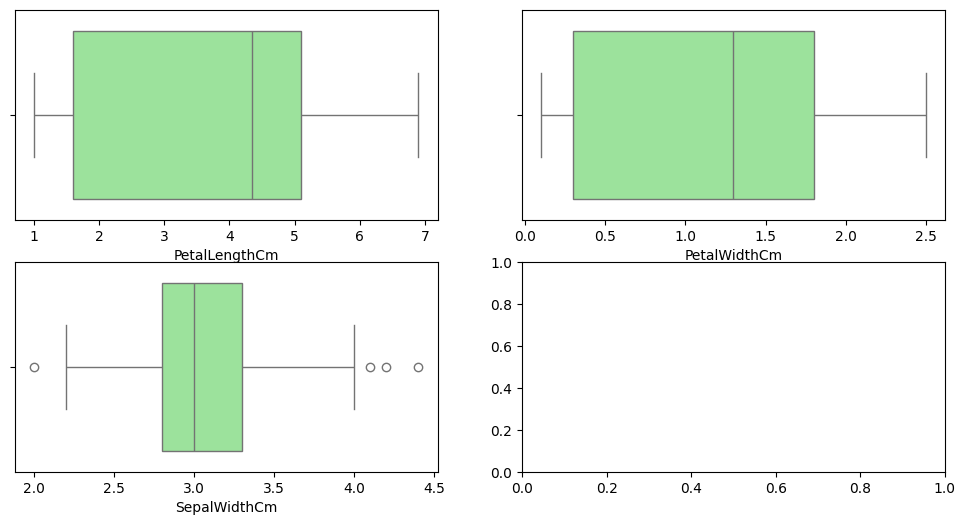

In [9]:
# Plot the boxplots
# Give the plots a size
plt.figure(figsize=(12,6))

# subplot 1 of the 2row*2column plot
plt.subplot(2,2,1)
sns.boxplot(x='PetalLengthCm', data=df, color ="lightgreen")

# subplot 2 of the 2row*2column plot
plt.subplot(2,2,2)
sns.boxplot(x='PetalWidthCm', data=df, color ="lightgreen")

# subplot 2 of the 2row*2column plot
plt.subplot(2,2,3)
sns.boxplot(x='SepalWidthCm', data=df, color ="lightgreen")

# subplot 2 of the 2row*2column plot
plt.subplot(2,2,4)



# Show the plot 
plt.show()

##### <ins>The Interquartile Range</ins>

The DataFrame can also be tested for outliers using the *Interquartile Range (IQR)*. The interquartile range is calculated by getting the difference between the $Q1$ which is the $25^{th}$ percentile and $Q3$ wtich is the $75^{th}$ percentile [Wikipedia, (n.d.)](https://en.wikipedia.org/wiki/Interquartile_range).

$$IQR = Q3 – Q1$$

Once the interquartile range (IQR) is calculated, next the Lower and Upper Limits are calculated. These limits are calculated as follows:

$$Lower Limit = Q1 - (1.5*IQR)$$
$$Upper Limit = Q3 + (1.5*IQR)$$

Any datapoints that lie either below the lower limit or above the upper limit are considered to be outliers in the data [Zach, (2021)](https://www.statology.org/upper-and-lower-fences/). 

Below, I have sourced code from [Kleppen. E, (2023)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3%E2%80%93Q1).) which first defines a function called ``find_outliers_IQR`` and then uses the defined function to establish if any of the four attributes contain any outliers. Using the defined function, each numerical attribute is passed in to the function and and the print function then prints the number of outliers (if any) and the value of the maximum and minimum outlier.

Again, only the *SepalWidthCm* attribute contains outliers, with the same outlier values as the values I had already estimated from the box plot above.

In [10]:
# Define the Function 

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   
   #Return the defined function 
   return outliers

outliers = find_outliers_IQR(df["PetalLengthCm"])
print("*PetalLengthCm*")
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print("")

outliers = find_outliers_IQR(df["PetalWidthCm"])
print("*PetalWidthCm*")
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print("")

outliers = find_outliers_IQR(df["SepalLengthCm"])
print("*SepalLengthCm*")
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print("")

outliers = find_outliers_IQR(df["SepalWidthCm"])
print("*SepalWidthCm*")
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))


*PetalLengthCm*
number of outliers: 0
max outlier value: nan
min outlier value: nan

*PetalWidthCm*
number of outliers: 0
max outlier value: nan
min outlier value: nan

*SepalLengthCm*
number of outliers: 0
max outlier value: nan
min outlier value: nan

*SepalWidthCm*
number of outliers: 4
max outlier value: 4.4
min outlier value: 2.0


## <span style="color:darkred">References</span>
***

1. IBM, (n.d), What is machine learning </br>
https://www.ibm.com/topics/machine-learning

2. Tucci. Linda (n.d.), What is machine learning and how does it work? In-depth guide </br>
https://www.techtarget.com/searchenterpriseai/definition/machine-learning-ML#:~:text=In%2Ddepth%20guide,-Share%20this%20item&text=Machine%20learning%20(ML)%20is%20a,improve%20their%20performance%20over%20time.

3. IBM, (n.d), What is machine learning </br>
https://www.ibm.com/topics/machine-learning

4. datacamp, (Aug 2022). Supervised Machine Learning </br>
https://www.datacamp.com/blog/supervised-machine-learning

5. Shee. Ed, (Spetember 16, 2022). Supervised vs Unsupervised Learning Explained </br>
https://www.seldon.io/supervised-vs-unsupervised-learning-explained

6. datacamp, (September, 2022) Classification in Machine Learning: An Introduction </br>
https://www.datacamp.com/blog/classification-machine-learning

7. Shiksha Online, (January 27, 2023). Predicting Categorical Data Using Classification Algorithms </br>
https://www.shiksha.com/online-courses/articles/predicting-categorical-data-using-classification-algorithms/

8. IBM, (February 02, 2021). Variable Types. </br>
https://www.ibm.com/docs/en/spss-statistics/27.0.0?topic=charts-variable-types

9. Wikipedia, (2023). Ronald Fisher. </br> https://en.wikipedia.org/wiki/Ronald_Fisher

10. Wiley Online Library, (2023). THE USE OF MULTIPLE MEASUREMENTS IN TAXONOMIC PROBLEMS </br> https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x

11. Wikipedia, (2023). Edgar Anderson. </br> https://en.wikipedia.org/wiki/Edgar_Anderson

12. Wikipedia, (2023). *Iris* flower data set. </br> https://en.wikipedia.org/wiki/Iris_flower_data_set

13. kaggle. UCI Machine Learning. Iris Species </br>
https://www.kaggle.com/datasets/uciml/iris/

14. pandas, (November 10, 2023). pandas documentation </br>
https://pandas.pydata.org/docs/

15. geeksforgeeks, (n.d.), Python Float. </br> https://www.w3schools.com/python/gloss_python_float.asp

16. geeksforgeeks, (n.d.), Python String. </br> https://www.geeksforgeeks.org/python-string/

17. geeksforgeeks, (n.d.), Python Numbers. </br> https://www.geeksforgeeks.org/python-numbers/

18. w3schools, (n.d), Pandas DataFrame dtypes Property. </br> https://www.w3schools.com/python/pandas/ref_df_dtypes.asp

19. Statistics Globe, (n.d.), Convert Object Data Type to String in pandas DataFrame Column in Python (2 Examples) </br> https://statisticsglobe.com/convert-object-data-type-string-pandas-dataframe-column-python#:~:text=Hence%2C%20strings%20are%20by%20default,consider%20it%20as%20a%20string.

20. Siraj. S, Stackoverflow., (2017), How to convert column with dtype as object to string in Pandas Dataframe [duplicate] </br> https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe

21. W3schools, (n.d), Pandas DataFrame describe() Method </br> https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,The%20average%20(mean)%20value.

22. Patanam. I, Stackoverflow (2015). Pandas 'describe' is not returning summary of all columns </br> https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns

23. geeksforgeeks, (n.d), Check for Nan in Pandas DataFrame </br> https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/

24. Data to Fish, (n.d), Check for NaN in Pandas DataFrame (examples included) </br> https://datatofish.com/check-nan-pandas-dataframe/

25. FreeCodeCamp, (March 27,2023), Dataframe Drop Column in Pandas – How to Remove Columns from Dataframes </br> https://www.freecodecamp.org/news/dataframe-drop-column-in-pandas-how-to-remove-columns-from-dataframes/

26. McLeod. S, (July 31,2023), SimplyPsychology. Box Plot Explained: Interpretation, Examples, & Comparison </br> https://www.simplypsychology.org/boxplots.html

27. geeksforgeeks. (n.d). Handling Outliers. </br> https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/

28. w3schools. (n.d) Matplotlib Subplot. </br> https://www.w3schools.com/python/matplotlib_subplot.asp

</br>

### <span style="color:darkred">Markdown References</span>
1. Ramalingam. Aravind. medium.com (June 10, 2021) 7 Advanced Markdown Tips! </br>
https://medium.com/analytics-vidhya/7-advanced-markdown-tips-5a031620bf52

2. Markdown Guide, (2023) Image Captions </br>
https://www.markdownguide.org/hacks/

3. Markdown Guide, (2023) Underline. </br> https://www.markdownguide.org/hacks/#:~:text=If%20your%20Markdown%20processor%20supports,these%20words%20will%20be%20underlined%20.



# <span style="color:darkred">End</span>
***